In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
import numpy as np
import matplotlib as mpl
import pickle
from copy import copy
from tqdm import tqdm_notebook as tqdm
from importlib import reload

import readdy_learn.example.mapk as mapk

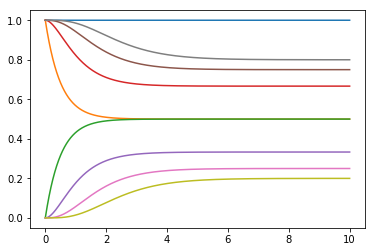

In [7]:
mapk.TIMESTEP = 1e-3
mapk.N_STIMULUS = 1
mapk.INITIAL_STATES[0][0] = mapk.N_STIMULUS
cfg = mapk.MAPKConfiguration()
time, count, dcount_dt = mapk.generate_lma(10, cfg)

plt.plot(time, count)
plt.show()

In [11]:
activities = []
stimulus = np.logspace(-3, 2, num=100)
for N_STIMULUS in tqdm(stimulus):
    mapk.TIMESTEP = 1e-3
    mapk.INITIAL_STATES[0][0] = N_STIMULUS
    time, count, dcount_dt = mapk.generate_lma(10, cfg)
    activities.append(count[-1, -1])
mapk.TIMESTEP = 1e-3
mapk.N_STIMULUS = 1
mapk.INITIAL_STATES[0][0] = mapk.N_STIMULUS

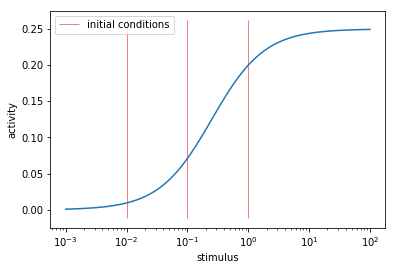

In [19]:
plt.semilogx(stimulus, activities)
plt.xlabel('stimulus')
plt.ylabel('activity')
plt.vlines([1e-2, 1e-1, 1e0], *plt.ylim(), "xkcd:red", label="initial conditions", lw=0.5)
plt.legend()
plt.show()

In [20]:
mapk = reload(mapk)
cfg = mapk.MAPKConfiguration()

/home/chris/miniconda3/envs/rlearn/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


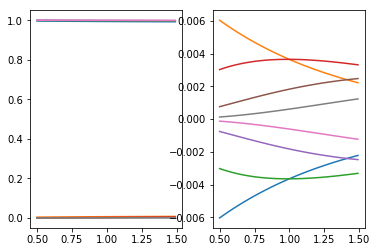

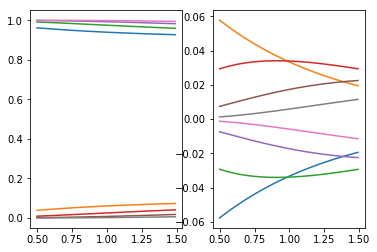

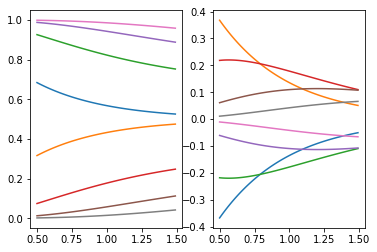

In [21]:
data = []
for N_STIMULUS in [1e-2, 1e-1, 1e0]:
    # mapk.TIMESTEP = 3e-2 # works well
    #mapk.TIMESTEP = 5e-3 # 2.7 works better
    mapk.TIMESTEP = 1e-2
    
    X = copy(mapk.INITIAL_STATES)
    X[0][0] = N_STIMULUS
    mapk.INITIAL_STATES = X
    time, count, dcount_dt = mapk.generate_lma(2, cfg)
    
    # only use middle snippet
    begin = len(time) // 4
    end = 3 * begin
    time = time[begin:end]
    count = count[begin:end]
    dcount_dt = dcount_dt[begin:end]
    
    # time, count, dcount_dt = mapk.generate_kmc(0, .003, n_realizations=15, njobs=5)
    data.append((time, count, dcount_dt))
    f, (ax1, ax2) = plt.subplots(1, 2)
    ax1.plot(time, count[:, 1:])
    ax2.plot(time, dcount_dt[:, 1:])
    # plt.plot(time, count[:, 1:])
    f.show()

In [22]:
time = np.concatenate([data[i][0] for i in range(len(data))])
counts = np.concatenate([data[i][1] for i in range(len(data))])
dcounts_dt = np.concatenate([data[i][2] for i in range(len(data))])

# shuffle
N = np.arange(len(time))
np.random.shuffle(N)
shuffled_time = time[N]
shuffled_counts = counts[N]
shuffled_dcounts_dt = dcounts_dt[N]

In [23]:
len(time)

300

In [25]:
rates_lsq = mapk.solve(cfg, counts, dcounts_dt, alpha=0., l1_ratio=1.)

Trying tolerance 1e-16
optimization problem did exit successfully (alpha=0.0, lambda=1.0)!
status 0: Optimization terminated successfully.
186 / 5000 iterations


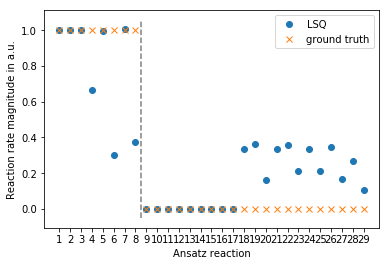

In [49]:
plt.plot(rates_lsq, 'o', label="LSQ")
plt.vlines([7.5], *plt.ylim(), 'grey', 'dashed')
plt.plot(cfg.rates, 'x', label="ground truth")
plt.xticks(ticks=range(len(cfg.rates)), labels=range(1, len(cfg.rates) + 1))
plt.xlabel("Ansatz reaction")
plt.ylabel("Reaction rate magnitude in a.u.")
plt.legend()

## Hyperparameter from distance to model
To see if regularization can get a better model than pure LSQ

In [59]:
result = mapk.solve_grid(cfg, shuffled_counts, shuffled_dcounts_dt, l1_ratios=(1.,), 
                         alphas=np.logspace(-10, -6, num=160), njobs=4)

Trying tolerance 1e-16
Trying tolerance 1e-16
Trying tolerance 1e-16
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=1.0596372886056498e-10, lambda=1.0)!
status 0: Optimization terminated successfully.
186 / 5000 iterations
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=1e-10, lambda=1.0)!
status 0: Optimization terminated successfully.
186 / 5000 iterations
optimization problem did exit successfully (alpha=1.1228311834035286e-10, lambda=1.0)!
status 0: Optimization terminated successfully.
186 / 5000 iterations
Trying tolerance 1e-16
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=1.1897937907435883e-10, lambda=1.0)!
status 0: Optimization terminated successfully.
186 / 5000 iterations
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=1.2607498664233685e-10, lambda=1.0)!
status 0: Optimization terminated successfully.
186 / 5000 iterations
Trying tolerance 1e-16
optimization problem did 

status 0: Optimization terminated successfully.
185 / 5000 iterations
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=1.4362588058302032e-09, lambda=1.0)!
status 0: Optimization terminated successfully.
185 / 5000 iterations
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=1.5219133867459052e-09, lambda=1.0)!
status 0: Optimization terminated successfully.
185 / 5000 iterations
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=1.6126761746240661e-09, lambda=1.0)!
status 0: Optimization terminated successfully.
185 / 5000 iterations
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=1.7088518090775767e-09, lambda=1.0)!
status 0: Optimization terminated successfully.
optimization problem did exit successfully (alpha=1.8107630975998157e-09, lambda=1.0)!
185 / 5000 iterations
status 0: Optimization terminated successfully.
185 / 5000 iterations
Trying tolerance 1e-16
Trying tolerance 1e-16
optimiz

status 0: Optimization terminated successfully.
338 / 5000 iterations
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=2.0628393573248017e-08, lambda=1.0)!
status 0: Optimization terminated successfully.
329 / 5000 iterations
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=2.185861503424674e-08, lambda=1.0)!
status 0: Optimization terminated successfully.
354 / 5000 iterations
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=2.3162203567563814e-08, lambda=1.0)!
status 0: Optimization terminated successfully.
354 / 5000 iterations
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=2.454353458646543e-08, lambda=1.0)!
status 0: Optimization terminated successfully.
350 / 5000 iterations
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=2.6007244442001165e-08, lambda=1.0)!
status 0: Optimization terminated successfully.
350 / 5000 iterations
Trying tolerance 1e-16
optimizat

status 0: Optimization terminated successfully.
263 / 5000 iterations
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=2.9627711919708697e-07, lambda=1.0)!
status 0: Optimization terminated successfully.
270 / 5000 iterations
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=3.1394628326189353e-07, lambda=1.0)!
status 0: Optimization terminated successfully.
269 / 5000 iterations
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=3.3266918836345347e-07, lambda=1.0)!
status 0: Optimization terminated successfully.
275 / 5000 iterations
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=3.5250867676009135e-07, lambda=1.0)!
status 0: Optimization terminated successfully.
274 / 5000 iterations
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=3.735313384520279e-07, lambda=1.0)!
status 0: Optimization terminated successfully.
271 / 5000 iterations
Trying tolerance 1e-16
optimiza

In [60]:
alphas = np.array([res[0] for res in result])
sort = np.argsort(alphas)
alphas_gs = alphas[sort]
estimated_rates = np.array([res[2] for res in result])
estimated_rates_gs = estimated_rates[sort]
l1_errs_gs = np.sum(np.abs(estimated_rates_gs - cfg.rates), axis=1)

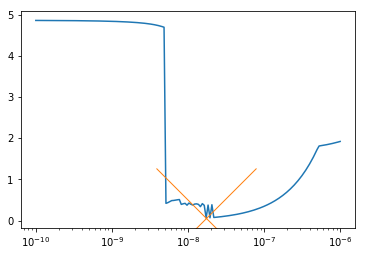

In [66]:
plt.semilogx(alphas_gs, l1_errs_gs)
plt.plot([alphas_gs[np.argmin(l1_errs_gs)]], [l1_errs_gs[np.argmin(l1_errs_gs)]], 'x', markersize=100)

In [67]:
alphas_gs[np.argmin(l1_errs_gs)]

1.7337788895633694e-08

In [68]:
best_estimated_rates_gs = estimated_rates_gs[np.argmin(l1_errs_gs)]

Text(0, 0.5, 'Reaction rate magnitude in a.u.')

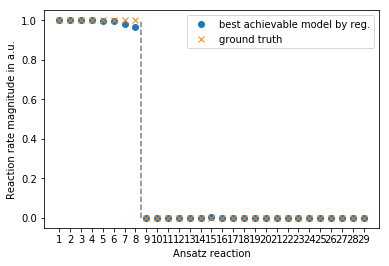

In [69]:
plt.plot(best_estimated_rates_gs, 'o', label="best achievable model by reg.")
plt.vlines([7.5], 0, 1, 'grey', 'dashed')
plt.plot(cfg.rates, 'x', label="ground truth")
plt.xticks(ticks=range(len(cfg.rates)), labels=range(1, len(cfg.rates) + 1))
plt.legend()
plt.xlabel("Ansatz reaction")
plt.ylabel("Reaction rate magnitude in a.u.")

## Hyperparameter from cross validation (proper analysis)

In [51]:
cv_result = mapk.cv(cfg, shuffled_counts, shuffled_dcounts_dt, 
                    alphas=np.logspace(-10, -7, 80), n_splits=15, njobs=4)

validating across grid with 80 alphas, 1 lambdas, 1 cutoffs with 1 realizations


Running kfold with n_splits=15
Running kfold with n_splits=15
Test: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
Test: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
Solving for tolerance 1e-16
Solving for tolerance 1e-16
Running kfold with n_splits=15
Test: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
Running kfold with n_splits=15
Solving for tolerance 1e-16
Test: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
Solving for tolerance 1e-16
Test: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Solving for tolerance 1e-16
Test: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Solving for tolerance 1e-16
Test: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Solving for tolerance 1e-16
Test: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Solving for tolerance 1e-16
Test: [40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59]
Solving for tolerance 1e-16
Test: [40 41

Solving for tolerance 1e-16
Test: [60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79]
Solving for tolerance 1e-16
Test: [80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99]
Solving for tolerance 1e-16
Test: [80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99]
Solving for tolerance 1e-16
Test: [80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99]
Solving for tolerance 1e-16
Test: [80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99]
Solving for tolerance 1e-16
Test: [100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119]
Solving for tolerance 1e-16
Test: [100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119]
Solving for tolerance 1e-16
Test: [100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119]
Solving for tolerance 1e-16
Test: [100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119]
Solving for tolerance 1e-16
Test: [120 121 122 123 1

 158 159]
Solving for tolerance 1e-16
Test: [140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157
 158 159]
Solving for tolerance 1e-16
Test: [140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157
 158 159]
Solving for tolerance 1e-16
Test: [140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157
 158 159]
Solving for tolerance 1e-16
Test: [160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177
 178 179]
Solving for tolerance 1e-16
Test: [160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177
 178 179]
Solving for tolerance 1e-16
Test: [160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177
 178 179]
Solving for tolerance 1e-16
Test: [160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177
 178 179]
Solving for tolerance 1e-16
Test: [180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199]
Solving for tolerance 1e-16
Test: [180 181 182 183 184

 218 219]
Solving for tolerance 1e-16
Test: [200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217
 218 219]
Solving for tolerance 1e-16
Test: [200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217
 218 219]
Solving for tolerance 1e-16
Test: [220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237
 238 239]
Solving for tolerance 1e-16
Test: [220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237
 238 239]
Solving for tolerance 1e-16
Test: [220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237
 238 239]
Solving for tolerance 1e-16
Test: [220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237
 238 239]
Solving for tolerance 1e-16
Test: [240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257
 258 259]
Solving for tolerance 1e-16
Test: [240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257
 258 259]
Solving for tolerance 1e-16
Test: [240 241 242 243 244

 278 279]
Solving for tolerance 1e-16

Solving for tolerance 1e-16
Test: [280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297
 298 299]
Solving for tolerance 1e-16
Test: [280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297
 298 299]
Solving for tolerance 1e-16
Test: [260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277
 278 279]
Solving for tolerance 1e-16
Test: [280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297
 298 299]
Solving for tolerance 1e-16
Running kfold with n_splits=15
Test: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
Solving for tolerance 1e-16
Running kfold with n_splits=15
Test: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
Solving for tolerance 1e-16
Running kfold with n_splits=15
Test: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
Solving for tolerance 1e-16
Test: [280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297
 298 

Solving for tolerance 1e-16
Test: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Solving for tolerance 1e-16
Test: [40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59]
Solving for tolerance 1e-16
Test: [40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59]
Solving for tolerance 1e-16
Test: [40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59]
Solving for tolerance 1e-16
Test: [60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79]
Solving for tolerance 1e-16
Test: [60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79]
Solving for tolerance 1e-16
Test: [60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79]
Solving for tolerance 1e-16
Test: [80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99]
Solving for tolerance 1e-16
Test: [80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99]
Solving for tolerance 1e-16
Test: [60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79]
Solving for tolerance 1e-16
Test: [80 81

Solving for tolerance 1e-16
Test: [120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139]
Solving for tolerance 1e-16
Test: [120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139]
Solving for tolerance 1e-16
Test: [120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139]
Solving for tolerance 1e-16
Test: [100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119]
Solving for tolerance 1e-16
Test: [140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157
 158 159]
Solving for tolerance 1e-16
Test: [140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157
 158 159]
Solving for tolerance 1e-16
Test: [140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157
 158 159]
Solving for tolerance 1e-16
Test: [120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139]
Solving for tolerance 1e-16
Test: [160 161 162 163 164 165 166 1

 198 199]
Solving for tolerance 1e-16
Test: [180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199]
Solving for tolerance 1e-16
Test: [180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199]
Solving for tolerance 1e-16
Test: [160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177
 178 179]
Solving for tolerance 1e-16
Test: [200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217
 218 219]
Solving for tolerance 1e-16
Test: [200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217
 218 219]
Solving for tolerance 1e-16
Test: [200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217
 218 219]
Solving for tolerance 1e-16
Test: [180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199]
Solving for tolerance 1e-16
Test: [220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237
 238 239]
Solving for tolerance 1e-16
Test: [220 221 222 223 224

 258 259]
Solving for tolerance 1e-16
Test: [240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257
 258 259]
Solving for tolerance 1e-16
Test: [220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237
 238 239]
Solving for tolerance 1e-16
Test: [260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277
 278 279]
Solving for tolerance 1e-16
Test: [260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277
 278 279]
Solving for tolerance 1e-16
Test: [260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277
 278 279]
Solving for tolerance 1e-16
Test: [240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257
 258 259]
Solving for tolerance 1e-16
Test: [280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297
 298 299]
Solving for tolerance 1e-16
Test: [280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297
 298 299]
Solving for tolerance 1e-16
Test: [280 281 282 283 284

Solving for tolerance 1e-16
Running kfold with n_splits=15
Test: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
Solving for tolerance 1e-16
Test: [280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297
 298 299]
Solving for tolerance 1e-16
Test: [40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59]
Solving for tolerance 1e-16
Test: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Solving for tolerance 1e-16
Running kfold with n_splits=15
Test: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
Solving for tolerance 1e-16
Test: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Solving for tolerance 1e-16
Test: [60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79]
Solving for tolerance 1e-16
Test: [40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59]
Solving for tolerance 1e-16
Test: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Solving for tolerance 1e-16
Test: [80 81 82 83 84 85 

Solving for tolerance 1e-16
Test: [80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99]
Solving for tolerance 1e-16
Test: [60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79]
Solving for tolerance 1e-16
Test: [140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157
 158 159]
Solving for tolerance 1e-16
Test: [100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119]
Solving for tolerance 1e-16
Test: [40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59]
Solving for tolerance 1e-16
Test: [80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99]
Solving for tolerance 1e-16
Test: [160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177
 178 179]
Solving for tolerance 1e-16
Test: [120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139]
Solving for tolerance 1e-16
Test: [60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79]
Solving for tolerance 1e-16
Test: [100 101 102 103 1

Solving for tolerance 1e-16
Test: [200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217
 218 219]
Solving for tolerance 1e-16
Test: [160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177
 178 179]
Solving for tolerance 1e-16
Test: [140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157
 158 159]
Solving for tolerance 1e-16
Test: [100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119]
Solving for tolerance 1e-16
Test: [220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237
 238 239]
Solving for tolerance 1e-16
Test: [180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199]
Solving for tolerance 1e-16
Test: [160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177
 178 179]
Solving for tolerance 1e-16
Test: [120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139]
Solving for tolerance 1e-16
Test: [240 241 242 243 244 245 246 2

 238 239]
Solving for tolerance 1e-16
Test: [140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157
 158 159]
Solving for tolerance 1e-16
Test: [200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217
 218 219]
Solving for tolerance 1e-16
Test: [240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257
 258 259]
Solving for tolerance 1e-16
Test: [280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297
 298 299]
Solving for tolerance 1e-16
Test: [160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177
 178 179]
Solving for tolerance 1e-16
Test: [220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237
 238 239]
Solving for tolerance 1e-16
Test: [260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277
 278 279]
Solving for tolerance 1e-16
Running kfold with n_splits=15
Test: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
Solving for tolerance 1e-16
Test: [180 181 1

 218 219]
Solving for tolerance 1e-16
Running kfold with n_splits=15
Test: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
Solving for tolerance 1e-16
Test: [260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277
 278 279]
Solving for tolerance 1e-16
Test: [40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59]
Solving for tolerance 1e-16
Test: [220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237
 238 239]
Solving for tolerance 1e-16
Test: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Solving for tolerance 1e-16
Test: [280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297
 298 299]
Solving for tolerance 1e-16
Test: [60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79]
Solving for tolerance 1e-16
Test: [240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257
 258 259]
Solving for tolerance 1e-16
Test: [40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59]
Solving for

Solving for tolerance 1e-16
Test: [280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297
 298 299]
Solving for tolerance 1e-16
Test: [100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119]
Solving for tolerance 1e-16
Test: [80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99]
Solving for tolerance 1e-16
Test: [40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59]
Solving for tolerance 1e-16
Running kfold with n_splits=15
Test: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
Solving for tolerance 1e-16
Test: [120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139]
Solving for tolerance 1e-16
Test: [100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119]
Solving for tolerance 1e-16
Test: [60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79]
Solving for tolerance 1e-16
Test: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Solving for tolerance

 178 179]
Solving for tolerance 1e-16
Test: [100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119]
Solving for tolerance 1e-16
Test: [140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157
 158 159]
Solving for tolerance 1e-16
Test: [60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79]
Solving for tolerance 1e-16
Test: [180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199]
Solving for tolerance 1e-16
Test: [120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139]
Solving for tolerance 1e-16
Test: [160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177
 178 179]
Solving for tolerance 1e-16
Test: [80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99]
Solving for tolerance 1e-16
Test: [200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217
 218 219]
Solving for tolerance 1e-16
Test: [140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 1

 238 239]
Solving for tolerance 1e-16
Test: [120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139]
Solving for tolerance 1e-16
Test: [200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217
 218 219]
Solving for tolerance 1e-16
Test: [180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199]
Solving for tolerance 1e-16
Test: [240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257
 258 259]
Solving for tolerance 1e-16
Test: [140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157
 158 159]
Solving for tolerance 1e-16
Test: [220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237
 238 239]
Solving for tolerance 1e-16
Test: [200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217
 218 219]
Solving for tolerance 1e-16
Test: [260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277
 278 279]
Solving for tolerance 1e-16
Test: [160 161 162 163 164

In [52]:
alphas = []
scores = []
for res in cv_result['cv_result']:
    alphas.append(res['alpha'])
    scores.append(np.mean(res['score']))
alphas = np.array(alphas)
scores = np.array(scores)
N = np.argsort(alphas)

alphas_cv = alphas[N]
scores_cv = scores[N]

In [71]:
sel = np.argmin(-scores_cv)
alphas_cv[sel]

6.649435996665032e-09

(0.0, 1e-09)

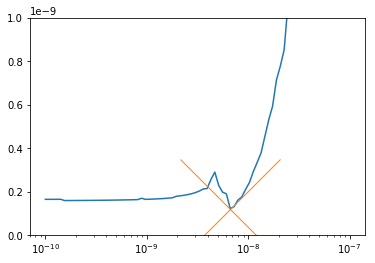

In [72]:
plt.semilogx(alphas_cv, -scores_cv)
plt.plot([alphas_cv[sel]], [-scores_cv[sel]], 'x', markersize=100)
plt.ylim(0., 0.1e-8)

In [73]:
rates_cv = mapk.solve(cfg, counts, dcounts_dt, alpha=alphas_cv[sel], l1_ratio=1.)

Trying tolerance 1e-16
optimization problem did exit successfully (alpha=6.649435996665032e-09, lambda=1.0)!
status 0: Optimization terminated successfully.
277 / 5000 iterations


Text(0, 0.5, 'Reaction rate magnitude in a.u.')

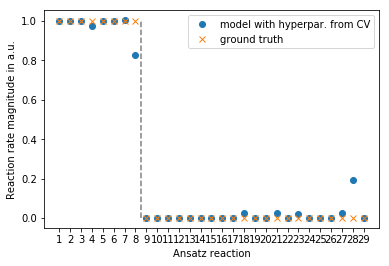

In [74]:
plt.plot(rates_cv, 'o', label="model with hyperpar. from CV")
plt.vlines([7.5], 0, 1, 'grey', 'dashed')
plt.plot(cfg.rates, 'x', label="ground truth")
plt.xticks(ticks=range(len(cfg.rates)), labels=range(1, len(cfg.rates) + 1))
plt.legend()
plt.xlabel("Ansatz reaction")
plt.ylabel("Reaction rate magnitude in a.u.")

## Save

In [75]:
np.savez(
    'mapk_data.npz', 
    time=time,
    counts=counts,
    dcounts_dt=dcounts_dt,
    alphas_gs=alphas_gs,
    l1_errs_gs=l1_errs_gs,
    estimated_rates_gs=estimated_rates_gs,
    best_estimated_rates_gs=best_estimated_rates_gs, 
    alphas_cv=alphas_cv, 
    scores_cv=scores_cv,
    rates_cv=rates_cv,
    rates_lsq=rates_lsq, 
    rates_desired=cfg.rates,
    stimulus=stimulus,
    activities=activities,
    init_state_activities=np.array([1e-2, 1e-1, 1e0])
)

# Tupelgeraffel

In [53]:
tuples = tuple((i, j) for i in range(1, 9) for j in range(9) if j > i)

In [54]:
pairs = tuple((tuples[i], tuples[j]) for i in range(len(tuples)) for j in range(len(tuples)) if j != i
             and tuples[i][0] == tuples[j][0] and tuples[i][1] - tuples[j][1] == -1 and tuples[i][1] % 2 == 1)

In [55]:
pairs = [(pairs[i][0], pairs[i][1]) for i in range(len(pairs))] 
        + [(pairs[i][1], pairs[i][0]) for i in range(len(pairs))]

In [56]:
pairs

[((1, 3), (1, 4)),
 ((1, 5), (1, 6)),
 ((1, 7), (1, 8)),
 ((2, 3), (2, 4)),
 ((2, 5), (2, 6)),
 ((2, 7), (2, 8)),
 ((3, 5), (3, 6)),
 ((3, 7), (3, 8)),
 ((4, 5), (4, 6)),
 ((4, 7), (4, 8)),
 ((5, 7), (5, 8)),
 ((6, 7), (6, 8)),
 ((1, 4), (1, 3)),
 ((1, 6), (1, 5)),
 ((1, 8), (1, 7)),
 ((2, 4), (2, 3)),
 ((2, 6), (2, 5)),
 ((2, 8), (2, 7)),
 ((3, 6), (3, 5)),
 ((3, 8), (3, 7)),
 ((4, 6), (4, 5)),
 ((4, 8), (4, 7)),
 ((5, 8), (5, 7)),
 ((6, 8), (6, 7))]